## CWRU Data Analytics  
**Unit 5 | Assignment - Pymaceuticals**  
  
Robert Wood  
3/16/2019

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
pymaceuticals_df = pd.merge(trial_df, mouse_df, on="Mouse ID", how="left")

# Display the data table for preview
pymaceuticals_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint

# Group by Drug and Timepoint
response_group = pymaceuticals_df.groupby(["Drug", "Timepoint"], as_index=False)

# Calculate mean Tumor Volume
tumor_volume = response_group["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
response_df = pd.DataFrame(data=tumor_volume)

# Preview DataFrame
response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
response_sem = pymaceuticals_df.groupby(["Drug", "Timepoint"]).sem()

# Convert to DataFrame
response_sem_df = pd.DataFrame(response_sem).reset_index()

# Drop unneeded columns
response_sem_df.drop(["Metastatic Sites", "Mouse ID"], axis = 1, inplace = True)

# Preview DataFrame
response_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Mean Tumor Volume data: Minor Data Munging to Re-Format the Data Frame
response_df_reformat = response_df.pivot("Timepoint", "Drug", "Tumor Volume (mm3)")

# Preview that Reformatting worked
response_df_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Standard Error: Minor Data Munging to Re-Format the Data Frame
response_sem_df_reformat = response_sem_df.pivot("Timepoint", "Drug", "Tumor Volume (mm3)")

# Preview that Reformatting worked
response_sem_df_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


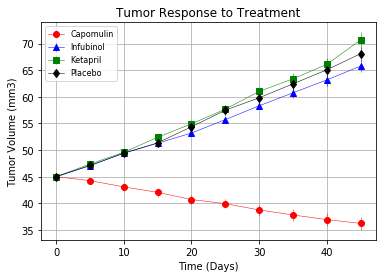

In [6]:
# Generate the Plot (with Error Bars)
plt.errorbar(response_df_reformat.index.values, response_df_reformat.loc[:,"Capomulin"],
             yerr = response_sem_df_reformat.loc[:, "Capomulin"], marker ='o', color='red', label="Capomulin", linewidth=.5)
plt.errorbar(response_df_reformat.index.values, response_df_reformat.loc[:,"Infubinol"],
             yerr = response_sem_df_reformat.loc[:, "Infubinol"], marker ='^', color='blue', label="Infubinol", linewidth=.5)
plt.errorbar(response_df_reformat.index.values, response_df_reformat.loc[:,"Ketapril"],
             yerr = response_sem_df_reformat.loc[:, "Ketapril"], marker ='s', color='green', label="Ketapril", linewidth=.5)
plt.errorbar(response_df_reformat.index.values, response_df_reformat.loc[:,"Placebo"],
             yerr = response_sem_df_reformat.loc[:, "Placebo"], marker ='d', color='black', label="Placebo", linewidth=.5)

# Format plot with title, axis labels, grid, and legend
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
lgnd = plt.legend(loc="upper left", fontsize=8)

# Save the Figure
plt.savefig("output/tumor_response.png", bbox_inches='tight')

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site_group = pymaceuticals_df.groupby(["Drug", "Timepoint"], as_index=False)

# Calculate Mean Met. Site value
met_site = met_site_group["Metastatic Sites"].mean()

# Convert to DataFrame
met_site_df = pd.DataFrame(data=met_site)

# Preview DataFrame
met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_sem = pymaceuticals_df.groupby(["Drug", "Timepoint"]).sem()

# Convert to DataFrame
met_site_sem_df = pd.DataFrame(met_site_sem).reset_index()

# Drop unneeded columns
met_site_sem_df.drop(["Mouse ID", "Tumor Volume (mm3)"], axis = 1, inplace = True)

# Preview DataFrame
met_site_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Met. Site Data: Minor Data Munging to Re-Format the Data Frame
met_site_df_reformat = met_site_df.pivot("Timepoint", "Drug", "Metastatic Sites")

# Preview that Reformatting worked
met_site_df_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Standard Error: Minor Data Munging to Re-Format the Data Frame
met_site_sem_df_reformat = met_site_sem_df.pivot("Timepoint", "Drug", "Metastatic Sites")

# Preview that Reformatting worked
met_site_sem_df_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


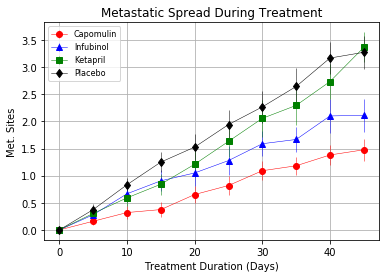

In [11]:
# Generate the Plot (with Error Bars)
plt.errorbar(met_site_df_reformat.index.values, met_site_df_reformat.loc[:,"Capomulin"],
             yerr = met_site_sem_df_reformat.loc[:, "Capomulin"], marker ='o', color='red', label="Capomulin", linewidth=.5)
plt.errorbar(met_site_df_reformat.index.values, met_site_df_reformat.loc[:,"Infubinol"],
             yerr = met_site_sem_df_reformat.loc[:, "Infubinol"], marker ='^', color='blue', label="Infubinol", linewidth=.5)
plt.errorbar(met_site_df_reformat.index.values, met_site_df_reformat.loc[:,"Ketapril"],
             yerr = met_site_sem_df_reformat.loc[:, "Ketapril"], marker ='s', color='green', label="Ketapril", linewidth=.5)
plt.errorbar(met_site_df_reformat.index.values, met_site_df_reformat.loc[:,"Placebo"],
             yerr = met_site_sem_df_reformat.loc[:, "Placebo"], marker ='d', color='black', label="Placebo", linewidth=.5)

# Format plot with title, axis labels, grid, and legend
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid()
lgnd = plt.legend(loc="upper left", fontsize=8)

# Save the Figure
plt.savefig("output/met_sites.png", bbox_inches='tight')

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint
mice_group = pymaceuticals_df.groupby(["Drug", "Timepoint"], as_index=False)

# Calculate count of Mice
mice = mice_group["Mouse ID"].count()

# Convert to DataFrame
mice_df = pd.DataFrame(data=mice)

# Preview DataFrame
mice_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mice_df_reformat = mice_df.pivot("Timepoint", "Drug", "Mouse ID")

# Preview that Reformatting worked
mice_df_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


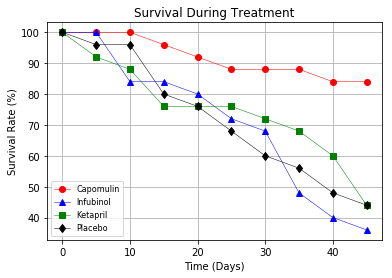

In [14]:
# Generate the Plot (Accounting for percentages)
plt.plot(mice_df_reformat.index.values, mice_df_reformat.loc[:,"Capomulin"] / mice_df_reformat.loc[0,"Capomulin"] * 100,
         marker ='o', color='red', label="Capomulin", linewidth=.5)
plt.plot(mice_df_reformat.index.values, mice_df_reformat.loc[:,"Infubinol"] / mice_df_reformat.loc[0,"Infubinol"] * 100,
         marker ='^', color='blue', label="Infubinol", linewidth=.5)
plt.plot(mice_df_reformat.index.values, mice_df_reformat.loc[:,"Ketapril"] / mice_df_reformat.loc[0,"Ketapril"] * 100,
         marker ='s', color='green', label="Ketapril", linewidth=.5)
plt.plot(mice_df_reformat.index.values, mice_df_reformat.loc[:,"Placebo"] / mice_df_reformat.loc[0,"Placebo"] * 100,
         marker ='d', color='black', label="Placebo", linewidth=.5)

# Format plot with title, axis labels, grid, and legend
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
lgnd = plt.legend(loc="lower left", fontsize=8)

# Save the Figure
plt.savefig("output/survival_rate.png", bbox_inches='tight')

## Summary Bar Graph

In [112]:
# Calculate the percent changes for each drug
# response_summary = pymaceuticals_df.groupby(["Drug"])
# # percent_change = (response_summary[["Tumor Volume (mm3)"]].max() - response_summary[["Tumor Volume (mm3)"]].min()) / response_summary[["Tumor Volume (mm3)"]].max()

# # percent_change
# # start = response_summary["Tumor Volume (mm3)"][0]
# end = response_summary["Tumor Volume (mm3)"].min()

# # percent_change_df = pd.DataFrame({"max": max,
# #                                   "min": min})
# # percent_change_df = percent_change_df.rename(columns={"Tumor Volume (mm3)":"max"})
# # percent_change_df["Percent Change"] = (max-min)/max
# # Display the data to confirm
# # percent_change_df.head()
# response_summary["Tumor Volume (mm3)"][0]

start_end_df = response_df_reformat.drop([5,10,15,20,25,30,35,40], axis = 0)
pct_response_df = start_end_df.append( (start_end_df.loc[45,:] - start_end_df.loc[0,:]) / start_end_df.loc[0,:] * 100, ignore_index=True)
pct_response_df.drop([0,1], axis = 0, inplace = True)
pct_response_df = pct_response_df.transpose()
pct_response_df = pct_response_df.rename(columns={2:"Percent Change"})
pct_response_df.head()

,Percent Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347


NameError: name 'retcs' is not defined

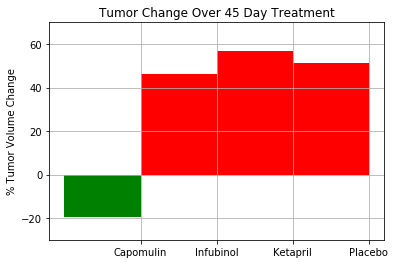

In [171]:
# Store all Relevant Percent Changes into a Tuple
pct_response_final_df = pct_response_df.drop(["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], axis = 0)

# Splice the data between passing and failing drugs
pct_response_passing_df = pct_response_final_df[pct_response_final_df["Percent Change"] <= 0]
pct_response_failing_df = pct_response_final_df[pct_response_final_df["Percent Change"] > 0]

# Plot data
plt.bar(pct_response_passing_df.index.values, pct_response_passing_df["Percent Change"], color = 'g',width=-1, align="edge")
plt.bar(pct_response_failing_df.index.values, pct_response_failing_df["Percent Change"], color = 'r',width=-1, align="edge")

# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid()
plt.yticks([-20, 0, 20, 40, 60])
plt.ylim(-30, 70)

# Use functions to label the percentages of changes
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(retcs,plt)

# Save the Figure
plt.savefig("output/summary_bar.png", bbox_inches='tight')